In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import fft
from scipy import signal
import scipy.linalg as la

In [2]:
df = pd.read_csv('center_sternum.txt', sep = '\t')
f = df['Log Freq'][0]
df

,Log Mode,Log Freq,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,MagnX,MagnY,MagnZ,qw,qi,qj,qk
0,5,200,1576222772,947.086,435.662,70.638,-6.824428,-14.244280,1.404580,-454,-490,-178,0.792622,0.254952,-0.553850,-0.000031
1,5,200,1576222772,969.168,387.777,88.877,6.183206,-12.290080,-7.969466,-454,-490,-177,0.736461,0.275124,-0.617969,0.006806
2,5,200,1576222772,989.603,380.335,78.751,11.709920,-4.961832,-7.450382,-454,-490,-177,0.729465,0.275246,-0.626118,0.009827
3,5,200,1576222772,954.894,418.033,88.328,17.877860,2.519084,-5.984733,-454,-492,-176,0.723413,0.277200,-0.632221,0.011383
4,5,200,1576222772,972.096,427.732,99.857,25.221370,5.404580,4.015267,-454,-492,-176,0.721948,0.280007,-0.632679,0.010193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16501,5,200,1576222847,958.493,291.092,-54.290,1.664122,2.305344,-0.671756,-494,-449,-126,0.650810,0.379162,-0.636402,0.166356
16502,5,200,1576222847,954.650,288.042,-49.654,1.480916,2.488550,-0.702290,-494,-450,-125,0.650239,0.379803,-0.636708,0.165960
16503,5,200,1576222847,967.338,290.482,-63.867,1.114504,3.374046,-0.900763,-494,-450,-125,0.649365,0.380627,-0.637227,0.165502
16504,5,200,1576222847,965.630,300.852,-56.242,0.702290,3.664122,-1.587786,-495,-448,-124,0.648973,0.381329,-0.637348,0.164953


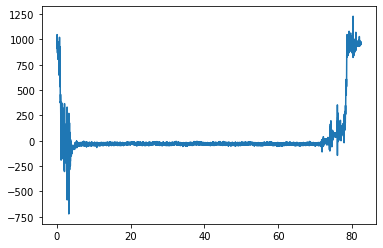

In [3]:
time = np.arange(df.shape[0])/f
sig = df['AccX']
plt.plot(time, sig)

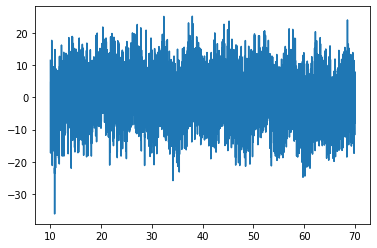

In [4]:
t = time[(time>10)&(time<70)]
g = sig[(time>10)&(time<70)]
g = g-g.mean()
plt.plot(t, g)

In [5]:
BPM_min = 40/60
BPM_max = 100/60

max freq:  69.00575047920661


(0.0, 2.0)

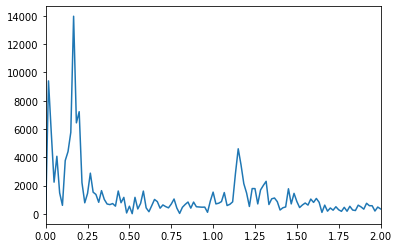

In [6]:
g_t = fft.rfft(g)
power = np.abs(g_t)
freq = fft.rfftfreq(len(g), d = 1/f)
plt.plot(freq, power)
plt.xlim(0,4)
search_freq = freq[(freq > BPM_min) & (freq < BPM_max)]
hr = search_freq[np.argmax(power[(freq > BPM_min) & (freq < BPM_max)])]
print('max freq: ', hr*60)
plt.xlim(0, 2)

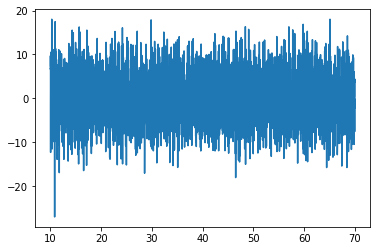

In [7]:
g_t2 = g_t.copy()
g_t2[freq < 0.5] = 0
g_t2[freq > 50] = 0
y = fft.irfft(g_t2)
plt.plot(t[:-1], y)

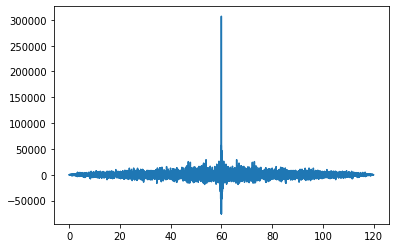

In [8]:
c = signal.correlate(y, y) 
t2 = np.arange(len(c))/f
plt.plot(t2, c)


max freq:  69.51448218378827


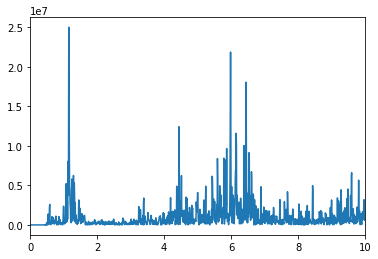

In [10]:
fc = fft.rfft(c)
freq2 = fft.rfftfreq(len(c), d = 1/f)
power = np.abs(fc)
plt.plot(freq2, power)
plt.xlim(0,10)
search_freq = freq2[(freq2 > BPM_min) & (freq2 < BPM_max)]
hr = search_freq[np.argmax(power[(freq2 > BPM_min) & (freq2 < BPM_max)])]
print('max freq: ', hr*60)

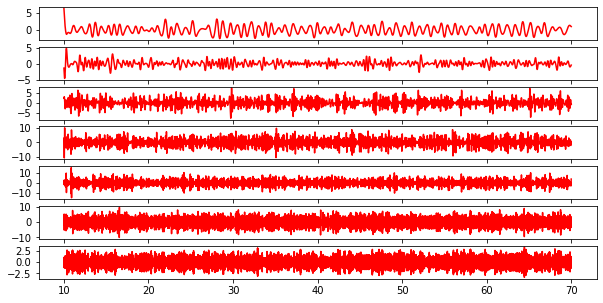

In [53]:
import pywt
n = 6
coeffs = pywt.wavedec(y, 'bior3.5', level = n)
sigs = np.zeros((n+1,len(t)-1))
for i in range(n+1):
    ca = coeffs.copy()
    for j in range(n+1):
        if j != i: 
            ca[j] = np.zeros_like(ca[j])
    sigs[i] = pywt.waverec(ca, 'bior3.5')

ax = []
fig, ax = plt.subplots(nrows = n+1, ncols = 1, figsize = (10, 5))
for i in range(n+1):
    ax[i].plot(t[:-1], sigs[i], color = 'red')


(30.0, 35.0)

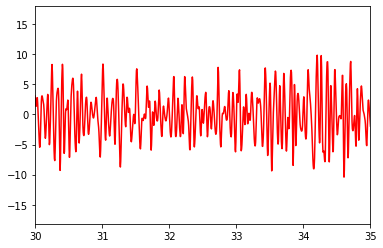

In [41]:
ca = coeffs.copy()
for j in range(n+1):
    if (j != 3) & (j!=4): 
        ca[j] = np.zeros_like(ca[j])
sig = pywt.waverec(ca, 'bior5.5')
plt.plot(t[:-1], sig, color = 'red')
plt.xlim(30, 35)

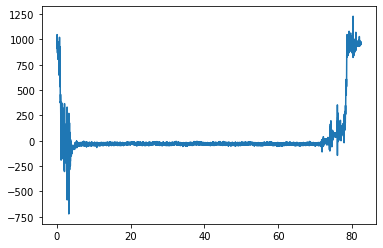

In [28]:
sig = df['AccX']
plt.plot(time, sig)